# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prepare_data_function import prepare_data_flights
import warnings
warnings.filterwarnings("ignore")

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

### XGBoost using XGBRegressor

In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
import warnings
warnings.filterwarnings("ignore")

In [101]:
df_xgboost = pd.read_csv('../../data/processed/transformed_model_flight_data.csv')
df_xgboost

,op_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,distance,route,month,day,fl_date,arr_delay,Key,AvgTemp,Precipitation,Snow_mm,WindSpeed,lat,lon
0,1610,22,11618,13495,1167,1962,3,1,2019-03-01,0.0,40.692501-40.692501,0.8,1.3,30.0,15.9,40.692501,-74.168701
1,4909,6,11618,14524,277,1978,12,6,2019-12-06,-17.0,40.692501-40.692501,5.7,0.0,0.0,12.2,40.692501,-74.168701
2,3556,26,11618,11193,569,1928,4,3,2018-04-03,-9.0,40.692501-40.692501,4.9,5.8,30.0,11.1,40.692501,-74.168701
3,1382,2,11618,11298,1372,1932,9,7,2019-09-07,68.0,40.692501-40.692501,20.4,0.0,0.0,6.3,40.692501,-74.168701
4,3517,26,11618,13495,1167,1962,2,5,2018-02-05,-37.0,40.692501-40.692501,0.3,0.0,0.0,13.4,40.692501,-74.168701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97302,5026,19,11092,11292,283,1111,9,22,2019-09-22,0.0,38.75500107-38.75500107,16.0,0.0,0.0,0.0,38.755001,-109.754997
97303,5031,19,11092,11292,283,1111,8,10,2019-08-10,-12.0,38.75500107-38.75500107,27.3,0.0,0.0,0.0,38.755001,-109.754997
97304,5079,19,11092,11292,283,1111,8,15,2018-08-15,2.0,38.75500107-38.75500107,28.5,0.0,0.0,10.7,38.755001,-109.754997
97305,5031,19,11092,11292,283,1111,5,26,2019-05-26,-22.0,38.75500107-38.75500107,18.3,0.0,0.0,11.4,38.755001,-109.754997


In [102]:
df_xgboost.shape

(97307, 17)

In [103]:
df_xgboost.dtypes

op_carrier_fl_num      int64
op_unique_carrier      int64
origin_airport_id      int64
dest_airport_id        int64
distance               int64
route                  int64
month                  int64
day                    int64
fl_date               object
arr_delay            float64
Key                   object
AvgTemp              float64
Precipitation        float64
Snow_mm              float64
WindSpeed            float64
lat                  float64
lon                  float64
dtype: object

In [104]:
X = df_xgboost.drop(['op_unique_carrier','dest_airport_id','day','fl_date','Key','lat','fl_date','arr_delay'], axis=1)
y = df_xgboost['arr_delay']

In [75]:
X

,op_carrier_fl_num,origin_airport_id,distance,route,month,AvgTemp,Precipitation,Snow_mm,WindSpeed
0,1610,11618,1167,1962,3,0.8,1.3,30.0,15.9
1,4909,11618,277,1978,12,5.7,0.0,0.0,12.2
2,3556,11618,569,1928,4,4.9,5.8,30.0,11.1
3,1382,11618,1372,1932,9,20.4,0.0,0.0,6.3
4,3517,11618,1167,1962,2,0.3,0.0,0.0,13.4
...,...,...,...,...,...,...,...,...,...
97302,5026,11092,283,1111,9,16.0,0.0,0.0,0.0
97303,5031,11092,283,1111,8,27.3,0.0,0.0,0.0
97304,5079,11092,283,1111,8,28.5,0.0,0.0,10.7
97305,5031,11092,283,1111,5,18.3,0.0,0.0,11.4


In [105]:
#Split dataset into training and test
seed = 8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed) 

In [106]:
#Initiate XGBoost object
xreg_model = XGBRegressor(objective= 'reg:squarederror', 
                          max_depth =10, 
                          learning_rate = 0.1,
                          n_estimators = 100)


In [107]:
#fit model to train data
xreg_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [108]:
pred_train = xreg_model.predict(X_train)

In [109]:
#Predict with test data
preds = xreg_model.predict(X_test)

In [110]:
#Test performance
rmse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
train_score = xreg_model.score(X_train, y_train)
test_score  = xreg_model.score(X_test, y_test)

In [111]:
print(f"RMSE:  {rmse:.4f}")
print(f"R2: {r2:.4f}" )
print(f"Training Score: {train_score:.4f}" )
print(f"Test Score: {test_score:.4f}" )

RMSE:  2409.3546
R2: -0.0196
Training Score: 0.4755
Test Score: -0.0196


In [112]:
import pickle
pickle.dump(xreg_model, open('../../data/pickles/XBoostModel.pkl', 'wb'))

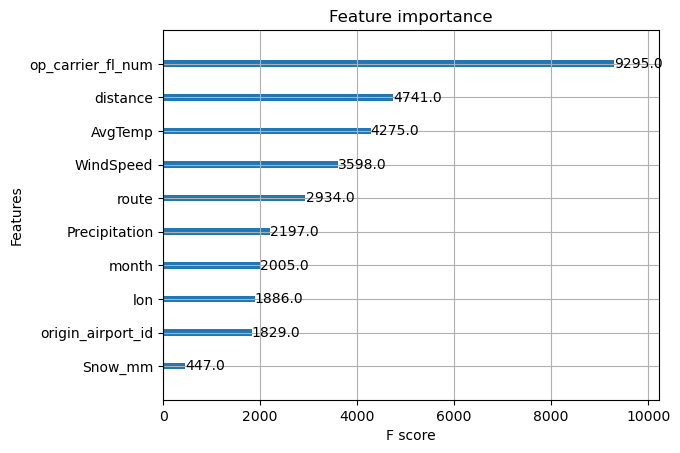

In [113]:
from xgboost import plot_importance

plot_importance(xreg_model)
plt.show()

In [114]:
print(xreg_model.feature_importances_)

[0.09498658 0.10972396 0.10427324 0.09632643 0.08857203 0.10635702
 0.11929662 0.08455484 0.08253919 0.11337017]


#### Test XGBoost Regression Model with test data

In [117]:
# Import pickle
import pickle

# Load model from file
xgr_model = pickle.load(open('../../data/pickles/XBoostModel.pkl', "rb"))

# Import test data
df_txboost = pd.read_csv('../../data/processed/transformed_week1_2020.csv')
df_txboost.rename(columns={'Month': 'month'}, inplace=True) 
df_txboost

,op_carrier_fl_num,op_unique_carrier,origin_airport_id,dest_airport_id,distance,route,day,Key,fl_date,AvgTemp,Precipitation,Snow_mm,WindSpeed,lat,lon,month
0,5390,21,14057,11292,991.0,2737,1,45.58869934-45.58869934,2020-01-01,10.8,3.8,0.0,11.9,45.588699,-122.598000,1
1,5752,6,14057,14747,129.0,2764,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
2,789,20,14057,11292,991.0,2737,2,45.58869934-45.58869934,2020-01-02,8.2,1.0,0.0,11.9,45.588699,-122.598000,1
3,1184,2,14057,14679,933.0,2763,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
4,1552,2,14057,14262,873.0,2760,7,45.58869934-45.58869934,2020-01-07,11.3,2.8,0.0,24.8,45.588699,-122.598000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,5147,17,14006,13930,342.0,2708,6,37.06079864501953-37.06079864501953,2020-01-06,5.3,0.0,0.0,7.9,37.060799,-88.773804,1
9912,5081,17,13121,13930,489.0,2064,2,37.8582992554-37.8582992554,2020-01-02,1.9,0.0,0.0,1.8,37.858299,-80.399498,1
9913,3845,14,11905,11298,140.0,1419,2,32.38399887084961-32.38399887084961,2020-01-02,12.1,4.6,0.0,11.9,32.383999,-94.711502,1
9914,4258,17,12003,14869,463.0,1466,6,47.48199844-47.48199844,2020-01-06,0.1,0.0,0.0,26.3,47.481998,-111.371002,1


In [118]:
X_2020 = df_txboost.drop(['op_unique_carrier','dest_airport_id','day','fl_date','Key','lat','fl_date'], axis=1)
X_2020 = df_txboost[['op_carrier_fl_num','origin_airport_id','distance','route','month','AvgTemp','Precipitation', 'Snow_mm', 'WindSpeed','lon']]
X_2020

,op_carrier_fl_num,origin_airport_id,distance,route,month,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon
0,5390,14057,991.0,2737,1,10.8,3.8,0.0,11.9,-122.598000
1,5752,14057,129.0,2764,1,11.3,2.8,0.0,24.8,-122.598000
2,789,14057,991.0,2737,1,8.2,1.0,0.0,11.9,-122.598000
3,1184,14057,933.0,2763,1,11.3,2.8,0.0,24.8,-122.598000
4,1552,14057,873.0,2760,1,11.3,2.8,0.0,24.8,-122.598000
...,...,...,...,...,...,...,...,...,...,...
9911,5147,14006,342.0,2708,1,5.3,0.0,0.0,7.9,-88.773804
9912,5081,13121,489.0,2064,1,1.9,0.0,0.0,1.8,-80.399498
9913,3845,11905,140.0,1419,1,12.1,4.6,0.0,11.9,-94.711502
9914,4258,12003,463.0,1466,1,0.1,0.0,0.0,26.3,-111.371002


In [119]:
# make predictions for test data
y_2020_pred = xgr_model.predict(X_2020)

In [120]:
X_2020['arr_delay'] = y_2020_pred
X_2020

,op_carrier_fl_num,origin_airport_id,distance,route,month,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,arr_delay
0,5390,14057,991.0,2737,1,10.8,3.8,0.0,11.9,-122.598000,-4.824976
1,5752,14057,129.0,2764,1,11.3,2.8,0.0,24.8,-122.598000,4.591178
2,789,14057,991.0,2737,1,8.2,1.0,0.0,11.9,-122.598000,-4.906904
3,1184,14057,933.0,2763,1,11.3,2.8,0.0,24.8,-122.598000,1.028403
4,1552,14057,873.0,2760,1,11.3,2.8,0.0,24.8,-122.598000,-5.284673
...,...,...,...,...,...,...,...,...,...,...,...
9911,5147,14006,342.0,2708,1,5.3,0.0,0.0,7.9,-88.773804,2.061316
9912,5081,13121,489.0,2064,1,1.9,0.0,0.0,1.8,-80.399498,3.926033
9913,3845,11905,140.0,1419,1,12.1,4.6,0.0,11.9,-94.711502,10.662498
9914,4258,12003,463.0,1466,1,0.1,0.0,0.0,26.3,-111.371002,13.733086


In [121]:
X_2020.sort_values(['arr_delay'], ascending = False).head(20)

,op_carrier_fl_num,origin_airport_id,distance,route,month,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,arr_delay
4644,5749,11292,73.0,902,1,0.8,0.0,0.0,29.2,-104.672997,232.986557
9767,117,14955,129.0,3537,1,0.0,0.3,0.0,24.5,145.729004,206.282318
8706,5247,10713,674.0,347,1,4.6,5.1,0.0,15.1,-116.223000,139.499969
184,5446,14843,1189.0,3429,1,25.6,1.3,0.0,6.8,-66.001801,135.866455
9662,3498,15323,868.0,3660,1,9.4,18.5,0.0,2.2,-82.407401,129.410339
9411,5108,10409,507.0,202,1,-10.6,0.0,0.0,12.7,-97.154701,122.854607
9298,72,12523,909.0,1806,1,-2.7,0.0,0.0,2.5,-134.576004,113.531792
159,2276,14843,1666.0,3422,1,26.1,22.4,0.0,16.9,-66.001801,103.339516
9052,4949,10581,393.0,275,1,0.9,0.0,80.0,3.2,-68.828102,101.759216
152,2321,14843,1608.0,3426,1,25.6,1.3,0.0,6.8,-66.001801,97.809624


In [122]:
X_2020.sort_values(['arr_delay']).head(20)

,op_carrier_fl_num,origin_airport_id,distance,route,month,AvgTemp,Precipitation,Snow_mm,WindSpeed,lon,arr_delay
3627,6191,11433,488.0,1166,1,5.6,0.0,0.0,21.9,-83.353401,-78.829247
7445,6191,12264,182.0,1588,1,11.3,8.9,0.0,10.8,-77.455803,-44.782700
1829,1,11278,2329.0,874,1,7.7,0.0,0.0,13.0,-77.037697,-36.979321
5367,673,12982,2979.0,2044,1,24.4,1.8,0.0,31.7,-159.339005,-30.425301
1759,1,11278,2329.0,874,1,4.8,0.0,0.0,7.9,-77.037697,-29.811468
1107,2,12892,2475.0,1921,1,14.3,0.0,0.0,7.2,-118.407997,-22.673399
8327,439,10721,2588.0,397,1,0.4,0.0,0.0,10.8,-71.005203,-21.575615
1172,2,12892,2475.0,1921,1,14.4,0.0,0.0,7.6,-118.407997,-21.150425
9531,6189,13296,610.0,2243,1,3.6,0.0,150.0,2.0,-71.435699,-20.251841
9268,6078,11540,715.0,1235,1,8.8,0.8,0.0,17.6,-106.377998,-19.854553


### XGBoost with k-fold cross validation

In [124]:
# Create regression matrices
data_dmatrix = xgb.DMatrix(data=X,label=y)
#dtest_dmatrix  = xgb.DMatrix(data=X_test,label=y_test)

In [125]:
# k-fold cross validation using xgboost

# Define parameters
params = {'objective':"reg:squarederror", 'learning_rate': '0.01', 'colsample_bytree':'0.3', 'max_depth': 10}
xg_CV = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=105)

In [126]:
#Show results for each folder
xg_CV.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,51.666777,0.857535,51.594173,3.575360
1,51.626762,0.867189,51.583621,3.573809
2,51.590706,0.860753,51.571383,3.575493
3,51.551269,0.863949,51.560130,3.576808
4,51.507249,0.859057,51.548550,3.578814


In [127]:
best_rmse = xg_CV['test-rmse-mean'].min()
best_rmse

51.247077585158344

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.